In [23]:
import pandas as pd
import numpy as np
import chardet
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import string
import utils.data_processing_utils as util

In [24]:
#Print unique authors and length of dataset
def print_info_df(data,label):
    print("The author dataset contains {} datapoints.".format(len(data)))
    print("There are {} unique authors.".format(len(data[label].unique())))

In [25]:
#Parameters
#file_name = "authorship_dataset.csv"
file_name = "processed_data.csv"

In [26]:
data = pd.read_csv(file_name)

In [27]:
#There are 23 unique authors with in the data 
print_info_df(data,"username")

The author dataset contains 27873 datapoints.
There are 22 unique authors.


<AxesSubplot:>

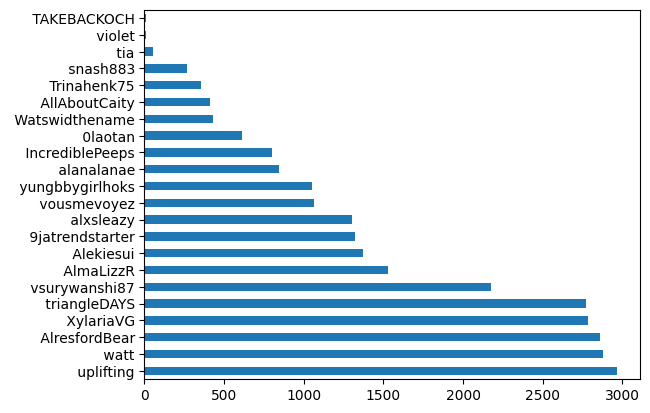

In [28]:
#Graph all the different count of Authors
CountStatus = data['username'].value_counts()
CountStatus
CountStatus.plot.barh()

In [29]:
# Create word count and character count lists
word_count, char_count, ave_length =  util.getTextMetaInformation(data,"raw_text")

In [30]:
print("Word count statistics")
util.get_stats(word_count)

Word count statistics
Min: 1
Max: 33
Mean: 9.321529795859792
Median 8.0
1st percentile 1.0
95th percentile 22.0
99th percentile 25.0
99.5th Percentile 27.0
99.9th Percentile 29.0


c:\Users\leobl\Desktop\COS801Project\COS801Assignment\Data\utils\data_processing_utils.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(array, kde = False, bins = 70, color = 'blue').set_title(title)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


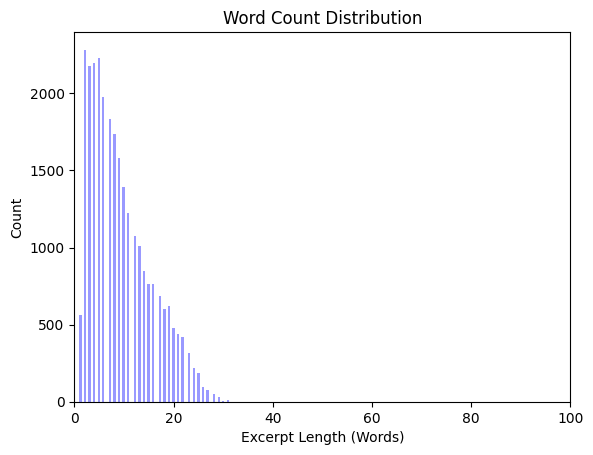

In [31]:
# Plot word count distribution
util.plot_snsplot(word_count,"Word Count Distribution",'Excerpt Length (Words)','Count',"outputs/word_count.eps")

In [32]:
print("\nCharacter count statistics")
util.get_stats(char_count)


Character count statistics
Min: 2
Max: 153
Mean: 60.61658235568471
Median 51.0
1st percentile 7.0
95th percentile 137.0
99th percentile 141.0
99.5th Percentile 144.0
99.9th Percentile 147.0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


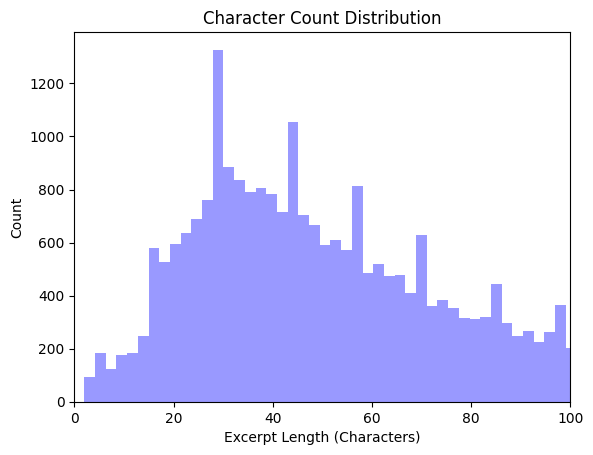

In [33]:
# Plot character count distribution
util.plot_snsplot(char_count,"Character Count Distribution",'Excerpt Length (Characters)','Count',"outputs/char_count.eps")

In [34]:
# Plot average word length distribution
print("\nAverage length statistics")
util.get_stats(ave_length)


Average length statistics
Min: 2.0
Max: 55.0
Mean: 7.286497604652933
Median 6.454545454545454
1st percentile 3.8461538461538463
95th percentile 13.179999999999927
99th percentile 19.5
99.5th Percentile 24.0
99.9th Percentile 25.564000000002125


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


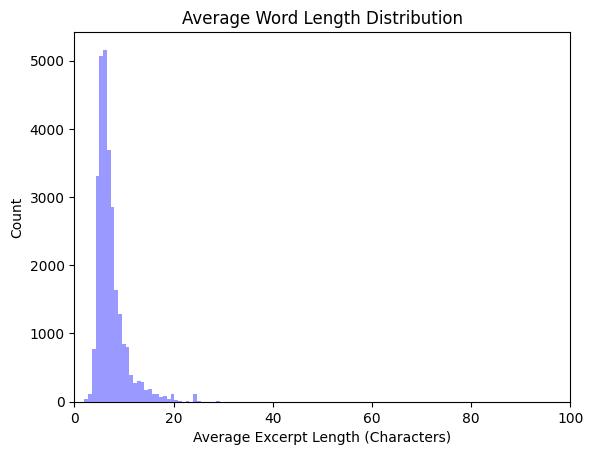

In [35]:
util.plot_snsplot(ave_length,"Average Word Length Distribution",'Average Excerpt Length (Characters)','Count',"outputs/ave_length.eps")

In [36]:
#Get text indexes with short word count 
short_word_count_outliers = util.get_outlier_indexes(word_count, 5, "less")
for i in short_word_count_outliers[0]:
    print("Excerpt {} - Length: {}".format(i, word_count[i]))
    print(data["raw_text"][i], "\n")

Excerpt 1 - Length: 1
 "son 

Excerpt 4 - Length: 2
 this. https://t.co/WiUKzhqXp1 

Excerpt 5 - Length: 2
 lol. https://t.co/SHvyAPP6Rf 

Excerpt 8 - Length: 2
 Unfortunate. https://t.co/dxUbUNeqPv 

Excerpt 14 - Length: 2
 Hala Madrid! 

Excerpt 16 - Length: 4
 "Your MCM said Kante 

Excerpt 18 - Length: 4
 someone finally notices. https://t.co/945wYrs6At 

Excerpt 21 - Length: 1
 "Ronaldo 

Excerpt 23 - Length: 4
 """The better BBC"" FC." 

Excerpt 24 - Length: 2
 #KBNueve! #HalaMadrid! 

Excerpt 29 - Length: 2
 @TheMayowaAbiru https://t.co/DtVmit5p2V 

Excerpt 30 - Length: 3
 so beautiful. https://t.co/zKmaL0apMa 

Excerpt 36 - Length: 2
 mantra: https://t.co/ZR8ukTvjq9 

Excerpt 38 - Length: 1
 "Q 

Excerpt 42 - Length: 4
 "+ annoyingly catchy lines 

Excerpt 45 - Length: 4
 real as fuck. https://t.co/UuQq7isMlf 

Excerpt 47 - Length: 4
 present for this. https://t.co/WBGYU1VSRq 

Excerpt 48 - Length: 3
 big mood. https://t.co/0FJ24npdRr 

Excerpt 52 - Length: 2
 Exactly. https://

In [37]:
#Get text indexes with short word count 
long_word_count_outliers = util.get_outlier_indexes(word_count, 30, "greater")
for i in long_word_count_outliers[0]:
    print("Excerpt {} - Length: {}".format(i, word_count[i]))
    print(data["raw_text"][i], "\n")

Excerpt 2207 - Length: 31
 i just got a call from some people from laffy but ig they didn't know they was on 3 way but they at the bank giving all they card info out 

Excerpt 2427 - Length: 31
 i refuse to go through a guy phone ... i just cant do it for my sake cause ik ima probably see something i don't like &amp; get my feelings hurt 

Excerpt 8424 - Length: 31
 I know I wasnt meant to be here. I worked that out a very long time ago. But I try my best knowing that people might care and need me too. 

Excerpt 10052 - Length: 31
 yesterday some guy went up to me &amp; said i was cute &amp; if he could kiss me &amp; he would give me a shot .... i said i so… https://t.co/zPp9cIHhxQ 

Excerpt 11329 - Length: 33
 *shouting from the rooftops* I HATE GYM! I HATE GYM! I HATE GYM! I HATE GYM! I HATE GYM! I HATE GYM! I HATE GYM! I HATE GYM! I HATE GYM! I H 

Excerpt 11882 - Length: 31
 So probably going to focus on my patron and work and making my own art for a while. With a bit of luck I'll 

In [38]:
# Get long word length outliers
long_word_length_outliers = util.get_outlier_indexes(ave_length, 23, "greater")
for i in long_word_length_outliers[0]:
    print("Excerpt {} - Average Length: {}".format(i, ave_length[i]))
    print(data["raw_text"][i], "\n")

Excerpt 424 - Average Length: 24.5
 #BuyNaijaToGrowTheNaira. https://t.co/tnqSdl5ulw 

Excerpt 3084 - Average Length: 30.5
 &gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt; https://t.co/GrTEKKozbg 

Excerpt 3496 - Average Length: 24.0
 https://t.co/yOXGyELCmn 

Excerpt 3509 - Average Length: 24.0
 https://t.co/yOXGyELCmn 

Excerpt 3524 - Average Length: 24.0
 https://t.co/yOXGyELCmn 

Excerpt 3529 - Average Length: 24.0
 https://t.co/yOXGyELCmn 

Excerpt 3630 - Average Length: 24.0
 https://t.co/yOXGyELCmn 

Excerpt 4253 - Average Length: 24.0
 *CAPRICORNS♑️♑️♑️♑️♑️♑️ https://t.co/SxtyD0TveL 

Excerpt 5643 - Average Length: 34.5
 Awwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwww https://t.co/6h0o4r3yy7 

Excerpt 5729 - Average Length: 24.0
 G-Eazy-Complete(Lyrics) https://t.co/yLhyvRsM7i 

Excerpt 5833 - Average Length: 45.0
 🖕🏼🖕🏼🖕🏼🖕🏼🖕🏼🖕🏼🖕🏼🖕🏼🖕🏼🖕🏼🖕🏼🖕🏼🖕🏼🖕🏼🖕🏼🖕🏼🖕🏼🖕🏼🖕🏼🖕🏼🖕🏼🖕🏼 

Excerpt 5994 - Average Length: 26.0
 Xicanx=Mexican-American❤️ 

Excerpt 6188 - Average Length: 24.5
 #MuchAdoAboutCornedBeef #Shake

In [39]:
# Get short word length outliers
short_word_length_outliers = util.get_outlier_indexes(ave_length, 3.5, "less")
for i in short_word_length_outliers[0]:
    print("Excerpt {} - Average Length: {}".format(i, ave_length[i]))
    print(data["raw_text"][i], "\n")

Excerpt 38 - Average Length: 3.0
 "Q 

Excerpt 1159 - Average Length: 3.0
 ". 

Excerpt 1160 - Average Length: 3.0
 ". 

Excerpt 1161 - Average Length: 3.0
 ". 

Excerpt 1162 - Average Length: 3.0
 ". 

Excerpt 1165 - Average Length: 3.0
 ". 

Excerpt 1166 - Average Length: 3.0
 ". 

Excerpt 1167 - Average Length: 3.0
 ". 

Excerpt 1169 - Average Length: 3.0
 ". 

Excerpt 1265 - Average Length: 3.0
 ". 

Excerpt 2031 - Average Length: 3.3333333333333335
 i was at a 10 now about a 5.5 

Excerpt 2160 - Average Length: 3.142857142857143
 i have to be up for 6 

Excerpt 2167 - Average Length: 3.2
 he so far now 😭 

Excerpt 2364 - Average Length: 3.0
 ik i can do it 

Excerpt 2708 - Average Length: 3.4
 i need a drink 🙄 

Excerpt 2732 - Average Length: 3.3333333333333335
 im in need of a nap 

Excerpt 2754 - Average Length: 3.4
 man i tell you 😂 

Excerpt 2804 - Average Length: 3.375
 I swear I used to be shy 😁 

Excerpt 2833 - Average Length: 3.4
 I feel good rn 😭 

Excerpt 2835 - Average 

In [40]:
# print all unique all excerpts in lower case
util.print_unique_character_counts(data["raw_text"])

Counter({' ': 259800, 'e': 128883, 't': 116817, 'a': 104551, 'o': 97508, 'i': 90673, 's': 82163, 'n': 79344, 'r': 64352, 'h': 64076, 'l': 56057, 'd': 44317, 'c': 39142, 'm': 37417, 'u': 35997, 'y': 33262, 'p': 32761, 'g': 30882, 'w': 27284, '.': 25465, 'b': 25063, 'f': 22972, '@': 21876, '/': 21001, 'k': 20855, 'v': 14566, '"': 9701, 'j': 8445, ':': 7982, "'": 7153, 'z': 5405, 'x': 4987, '!': 4827, '_': 4541, '1': 4203, '0': 3706, 'q': 3318, '#': 3200, '2': 3075, '3': 2792, '8': 2465, '4': 2327, '9': 2326, '7': 2231, '5': 1860, '?': 1797, '6': 1774, '😂': 1306, ';': 1161, '-': 911, '…': 907, ')': 751, '&': 740, 'ा': 637, '👉': 613, '(': 596, '️': 432, 'र': 429, 'े': 426, '*': 408, '\u2060': 380, 'क': 368, '🔥': 331, '💀': 308, '😭': 304, 'ी': 293, 'त': 266, '➡': 253, '🏻': 232, 'न': 220, 'ल': 218, 'स': 214, 'ो': 213, 'ह': 210, '🏼': 197, 'म': 190, '्': 190, 'ि': 181, '🏽': 179, 'प': 178, '😆': 177, '📻': 169, '😍': 169, '🎤': 160, '🙏': 157, 'ग': 157, '😁': 156, '🤔': 152, '👀': 146, 'ज': 139, '’': 13

Counter({' ': 259800,
         '"': 9701,
         'a': 104551,
         'p': 32761,
         'r': 64352,
         'e': 128883,
         'c': 39142,
         'i': 90673,
         't': 116817,
         'o': 97508,
         'f': 22972,
         'n': 79344,
         's': 82163,
         'm': 37417,
         'u': 35997,
         'g': 30882,
         'h': 64076,
         'l': 56057,
         '?': 1797,
         'k': 20855,
         'y': 33262,
         '.': 25465,
         ':': 7982,
         '/': 21001,
         'w': 27284,
         'x': 4987,
         'b': 25063,
         '4': 2327,
         'd': 44317,
         "'": 7153,
         'v': 14566,
         'q': 3318,
         '8': 2465,
         'z': 5405,
         'j': 8445,
         '1': 4203,
         '6': 1774,
         '3': 2792,
         '7': 2231,
         '…': 907,
         '2': 3075,
         '5': 1860,
         '@': 21876,
         '_': 4541,
         '!': 4827,
         '0': 3706,
         '9': 2326,
         '-': 911,
         '#'

In [41]:
# Create list of accented characters
accented_chars = ['ï', 'é', 'ñ', 'è', 'ö', 'æ', 'ô', 'â', 'á', 'à', 'ê', 'ë']
accented_text = util.find_character_list_count(data["raw_text"],accented_chars)

There are 0 texts containing the characters provided.


In [42]:
# Print accented texts
for i in accented_text:
    print("Excerpt {}".format(i))
    print(data["raw_text"] + '\n')

In [43]:
util.count_text_with_string(data["raw_text"],"RT")

0

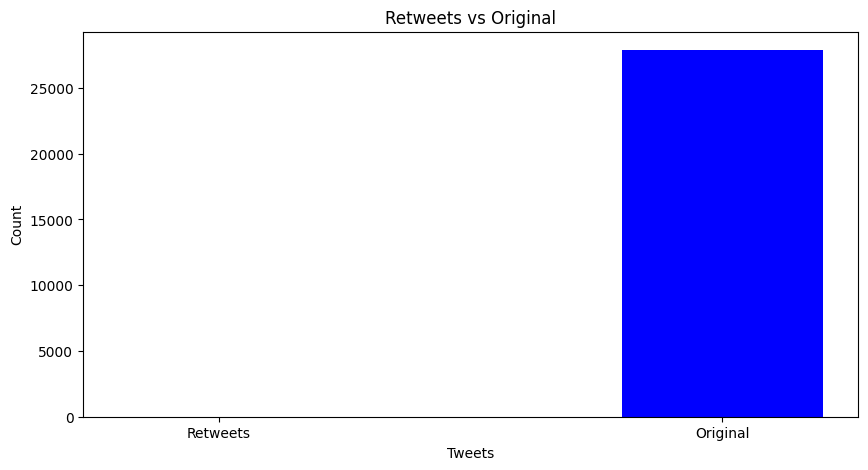

In [44]:
# creating the dataset
info = {'Retweets':data["raw_text"].str.count("RT").sum(), 'Original':len(data)-data["raw_text"].str.count("RT").sum()}
courses = list(info.keys())
values = list(info.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Tweets")
plt.ylabel("Count")
plt.title("Retweets vs Original")
plt.show()

plt.savefig("outputs/RetweetsVsOriginal.eps")